In [1]:
# understanding data:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\USER\Documents\Hotel_cleaned.csv')
print(df.shape)
print(df.info())
print(df.describe())

(119390, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  mea

In [2]:
# Filling missing values
df['children'] = df['children'].fillna(0).astype(int)
df['country'] = df['country'].fillna('Unknown')

In [3]:
# Convert date columns
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Creating new features
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['is_family'] = np.where((df['children'] > 0) & (df['total_guests'] >= 3), 1, 0)

Text(0.5, 1.0, 'Booking Cancellation Count')

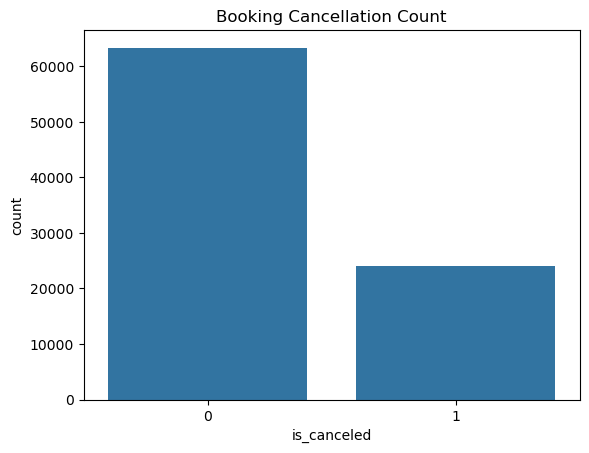

In [6]:
# using matplotlib and seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

# Cancellation distribution
sns.countplot(x='is_canceled', data=df)
plt.title('Booking Cancellation Count')

Text(0.5, 1.0, 'Lead Time vs Cancellation')

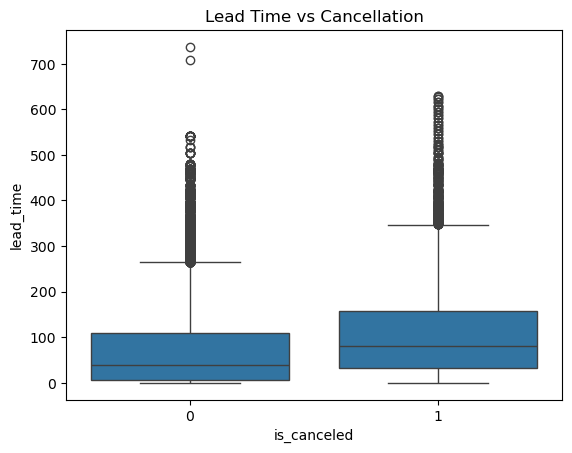

In [7]:
# Lead time vs Cancellation
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation')

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

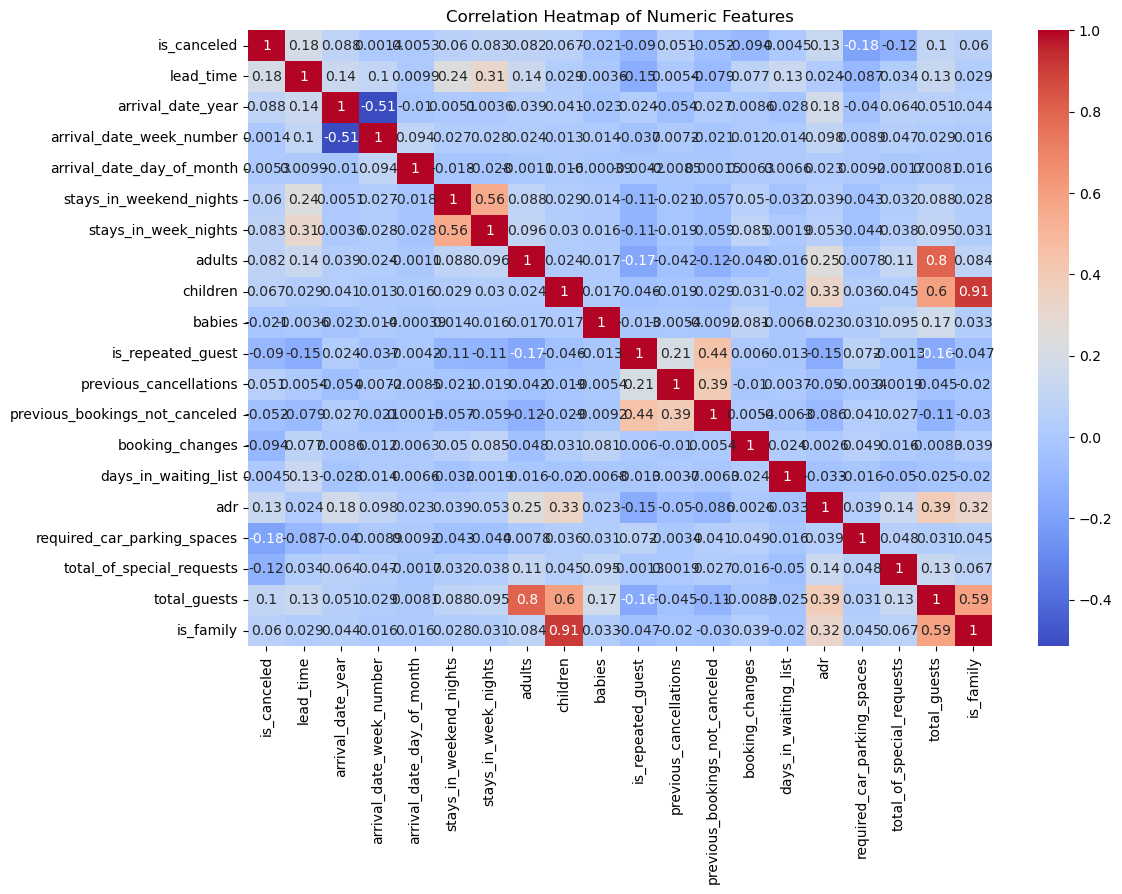

In [8]:
# Correlation heatmap
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")

In [9]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# Define features and label
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

In [12]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Dropping column temporarily
X = df.drop('is_canceled', axis=1)

# Show columns that are not numeric
non_numeric_cols = X.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns in your dataset:")
print(non_numeric_cols)

Non-numeric columns in your dataset:
Index(['hotel', 'arrival_date_month', 'children', 'meal', 'country',
       'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'company',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'arrival_date_full', 'invalid_arrival_date', 'Booking_month',
       'ADR_Error', 'is_family'],
      dtype='object')


In [16]:
# Converted categorical columns to numeric using one-hot encoding
X = pd.get_dummies(df.drop('is_canceled', axis=1), drop_first=True)

# Converted all data to numeric type safely
X = X.apply(pd.to_numeric, errors='coerce')

# Filling missing values
X.fillna(0, inplace=True)

# Setting variable
y = df['is_canceled']

In [21]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12733     0]
 [    3  4744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12733
           1       1.00      1.00      1.00      4747

    accuracy                           1.00     17480
   macro avg       1.00      1.00      1.00     17480
weighted avg       1.00      1.00      1.00     17480

